In [292]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split

from sklearn import tree

from holisticai.bias.plots import correlation_matrix_plot, abroca_plot
from holisticai.bias.metrics import classification_bias_metrics, abroca

In [105]:
os.chdir('C:\\Users\\Zezulka\\Documents\\01_PhD\\030-Projects\\2023-01_ALMP_LTU\\')

df = pd.read_csv('data\\1203_ALMP_Sample_IATEs.csv')

df.head()

,Unnamed: 0,ID,age,canton_french,canton_german,canton_italian,canton_moth_tongue,city,city_big,city_medium,...,iapo_employment,iapo_personality,em_no_program,em_vocational,em_computer,em_language,em_job_search,em_employment,em_personality,risk_score_logistic
0,1,93554,25,0,1,0,0,1,0,0,...,0.393110,0.359668,0.808551,0.016848,0.015574,0.021930,0.110201,0.011252,0.015643,0.279635
1,2,94572,40,0,1,0,0,1,0,0,...,0.489198,0.445922,0.845888,0.009302,0.017941,0.018355,0.075317,0.021092,0.012104,0.535164
2,3,90068,40,0,1,0,0,1,0,0,...,0.423456,0.329749,0.783048,0.017716,0.012653,0.022841,0.093024,0.006736,0.063983,0.205901
3,4,39400,41,0,1,0,0,1,0,0,...,0.470486,0.384549,0.854665,0.014282,0.011965,0.022706,0.070771,0.013388,0.012222,0.428461
4,5,396,38,0,1,0,0,3,1,0,...,0.490702,0.409687,0.830483,0.014704,0.012593,0.021510,0.098877,0.010584,0.011249,0.621403


In [258]:

# Var list including all dummy categories.
risk_var_list = ["age","canton_moth_tongue","city_big","city_medium","city_no",
                   "emp_share_last_2yrs","emp_spells_5yrs",
                   "female","foreigner_b","foreigner_c","gdp_pc","married","other_mother_tongue","past_income",
                   "prev_job_manager","prev_job_sec_mis","prev_job_sec1","prev_job_sec2",
                   "prev_job_sec3","prev_job_self","prev_job_skilled","prev_job_unskilled",
                   "qual_semiskilled","qual_degree","qual_unskilled","qual_wo_degree",
                   "swiss","ue_spells_last_2yrs","unemp_rate"
                ]
'''
risk_var_list = ["age","canton_moth_tongue",
                 "city_medium","city_no",
                 "emp_share_last_2yrs","emp_spells_5yrs",
                 "female","foreigner_b","foreigner_c","gdp_pc","married","other_mother_tongue","past_income",
                 "prev_job_self", "prev_job_skilled","prev_job_unskilled",
                 "prev_job_sec2", "prev_job_sec3", "prev_job_sec_mis",
                 "qual_semiskilled","qual_unskilled","qual_wo_degree",
                 "swiss", "ue_spells_last_2yrs","unemp_rate"
                 ]
'''
risk_var_cont_list = ['age', 'emp_share_last_2yrs', 'emp_spells_5yrs', 
                      'gdp_pc', 'past_income', 'ue_spells_last_2yrs', 'unemp_rate'
                     ]
risk_var_binary_list = [x for x in risk_var_list if x not in risk_var_cont_list]

In [259]:
df[risk_var_list].describe()

,age,canton_moth_tongue,city_big,city_medium,city_no,emp_share_last_2yrs,emp_spells_5yrs,female,foreigner_b,foreigner_c,...,prev_job_self,prev_job_skilled,prev_job_unskilled,qual_semiskilled,qual_degree,qual_unskilled,qual_wo_degree,swiss,ue_spells_last_2yrs,unemp_rate
count,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,...,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000,19291.000000
mean,36.745011,0.099269,0.195013,0.124359,0.680628,0.811019,1.151210,0.439220,0.132704,0.231196,...,0.005236,0.606552,0.286766,0.159349,0.586698,0.223420,0.030532,0.636100,0.546991,3.526455
std,8.708328,0.299031,0.396221,0.329999,0.466245,0.244197,1.413955,0.496305,0.339264,0.421608,...,0.072170,0.488527,0.452263,0.366011,0.492439,0.416548,0.172051,0.481133,1.194079,0.833437
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000
50%,36.000000,0.000000,0.000000,0.000000,1.000000,0.916667,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.200000
75%,43.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.400000
max,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.900000


In [260]:
df[risk_var_list].isna().sum(), df[risk_var_list].shape

(age                    0
 canton_moth_tongue     0
 city_big               0
 city_medium            0
 city_no                0
 emp_share_last_2yrs    0
 emp_spells_5yrs        0
 female                 0
 foreigner_b            0
 foreigner_c            0
 gdp_pc                 0
 married                0
 other_mother_tongue    0
 past_income            0
 prev_job_manager       0
 prev_job_sec_mis       0
 prev_job_sec1          0
 prev_job_sec2          0
 prev_job_sec3          0
 prev_job_self          0
 prev_job_skilled       0
 prev_job_unskilled     0
 qual_semiskilled       0
 qual_degree            0
 qual_unskilled         0
 qual_wo_degree         0
 swiss                  0
 ue_spells_last_2yrs    0
 unemp_rate             0
 dtype: int64,
 (19291, 29))

In [261]:
# correlation_matrix_plot(df, target_feature="y_exit12", n_features=29)
# ValueError: DataFrame cannot be converted to numerical values

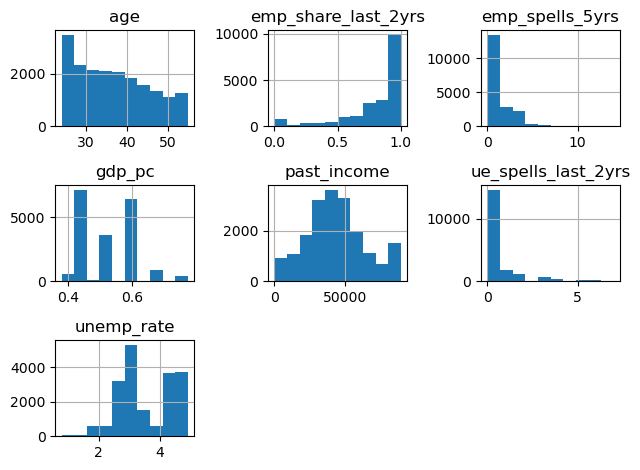

In [262]:
df[risk_var_cont_list].hist()
plt.tight_layout()
plt.show()

In [263]:
# prepare data
y = df['y_exit12']
X = df[risk_var_list]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
print(X_train.shape)
print(X_test.shape)

(15432, 29)
(3859, 29)


In [265]:
# normalise continious train data 
X_train_binary = X_train[risk_var_binary_list]
X_train_cont = X_train[risk_var_cont_list]

X_test_binary = X_test[risk_var_binary_list]
X_test_cont = X_test[risk_var_cont_list]

# MinMax scaling of continious variables
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# make named DataFrames
X_train_cont = pd.DataFrame(X_train_cont, columns=risk_var_cont_list)
X_train_binary = pd.DataFrame(X_train_binary, columns=risk_var_binary_list).reset_index(drop=True)

X_test_cont = pd.DataFrame(X_test_cont, columns=risk_var_cont_list)
X_test_binary = pd.DataFrame(X_test_binary, columns=risk_var_binary_list).reset_index(drop=True)

df_X_train = pd.concat([X_train_cont, X_train_binary], axis=1)
df_X_test =  pd.concat([X_test_cont, X_test_binary], axis=1)

In [266]:
df_X_train.head()

,age,emp_share_last_2yrs,emp_spells_5yrs,gdp_pc,past_income,ue_spells_last_2yrs,unemp_rate,canton_moth_tongue,city_big,city_medium,...,prev_job_sec2,prev_job_sec3,prev_job_self,prev_job_skilled,prev_job_unskilled,qual_semiskilled,qual_degree,qual_unskilled,qual_wo_degree,swiss
0,0.322581,1.000000,0.000000,0.748025,0.152135,0.000000,0.853659,1,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0.096774,1.000000,0.000000,0.307522,0.596180,0.000000,0.585366,0,0,0,...,0,1,0,0,1,1,0,0,0,1
2,0.838710,1.000000,0.000000,0.113585,0.273146,0.000000,0.512195,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0.354839,0.750000,0.071429,0.000000,0.592472,0.142857,0.902439,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.032258,0.708333,0.142857,0.113585,0.372247,0.571429,0.463415,0,0,0,...,0,0,0,0,1,0,0,1,0,1


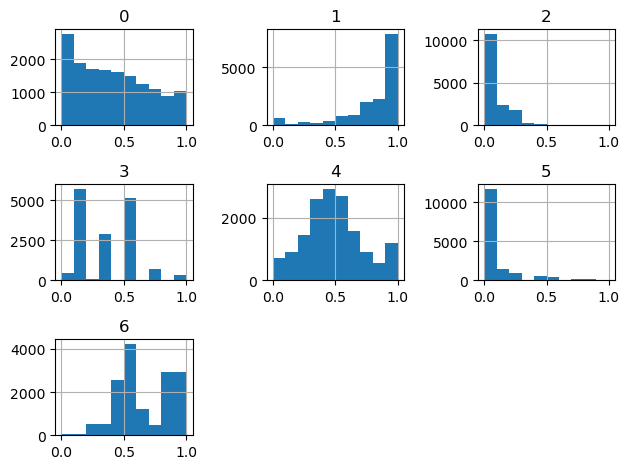

In [267]:
pd.DataFrame(X_cont).hist()
plt.tight_layout()
plt.show()

In [268]:
# Create a logistic regression model
logreg = LogisticRegression()
model = logreg.fit(df_X_train, y_train)

y_pred = model.predict(df_X_test)
y_proba = model.predict_proba(df_X_test)
y_score = y_proba[:,1]

In [269]:
pd.DataFrame(model.coef_, columns=df_X_train.columns).T

,0
age,1.132125
emp_share_last_2yrs,-0.757361
emp_spells_5yrs,0.041386
gdp_pc,0.730461
past_income,-1.122399
ue_spells_last_2yrs,0.504497
unemp_rate,-0.477196
canton_moth_tongue,-0.110971
city_big,0.006789
city_medium,0.081640


In [300]:
# Decision Trees
clf = tree.DecisionTreeClassifier(random_state=1)
# clf = clf.fit(df_X_train, y_train)

cross_val_score(clf, df_X_train, y_train, cv=10)
# y_proba_tree = clf.predict_proba(df_X_test)
# y_score_tree = y_proba_tree[:,1]
# y_pred_tree = clf.predict(df_X_test)

array([0.5738342 , 0.54727979, 0.56124433, 0.55346727, 0.55152301,
       0.56448477, 0.58327933, 0.53920933, 0.573558  , 0.57874271])

(array([[1.698e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.159e+03],
        [2.159e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.698e+03]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

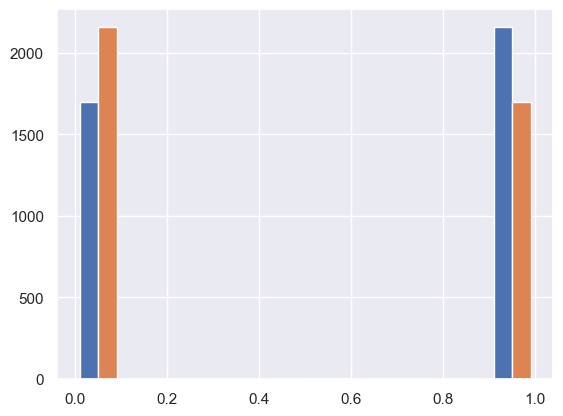

In [297]:
plt.hist(y_proba_tree)

In [270]:
df.groupby(['female'])['y_exit12'].mean()
df.groupby(['swiss'])['y_exit12'].mean()

# df.groupby(['female', 'swiss'])['y_exit12'].mean()

swiss
0    0.520940
1    0.363622
Name: y_exit12, dtype: float64

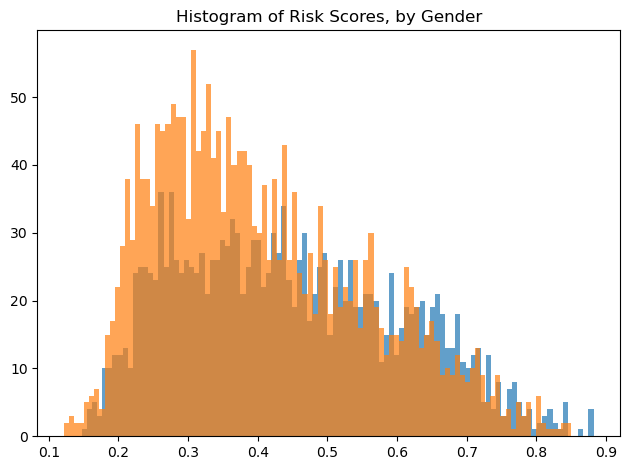

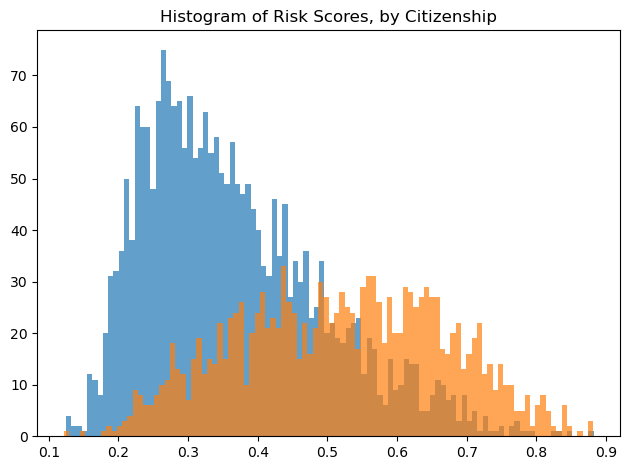

In [271]:
df_test = df.iloc[X_test.index]
y_score_old = df_test['risk_score_logistic']

plt.hist(y_score_old[X_test['female']==1], bins=100, alpha=0.7)
plt.hist(y_score_old[X_test['female']==0], bins=100, alpha=0.7)
plt.title("Histogram of Risk Scores, by Gender")
plt.tight_layout()
plt.show()

plt.hist(y_score_old[X_test['swiss']==1], bins=100, alpha=0.7)
plt.hist(y_score_old[X_test['swiss']==0], bins=100, alpha=0.7)
plt.title("Histogram of Risk Scores, by Citizenship")

plt.tight_layout()
plt.show()

In [278]:
female = np.squeeze((X_test['female'] == 1).values)
male = np.squeeze((X_test['female'] == 0).values)

citizen = np.squeeze((X_test['swiss'] == 1).values)
non_citizen = np.squeeze((X_test['swiss'] == 0).values)


df_fair_tests = classification_bias_metrics(
    female,
    male,
    y_pred,
    y_test,
    metric_type='both'
)
y_baseline = y_pred.copy()
df_baseline = df_fair_tests.copy()
df_baseline

,Value,Reference
Metric,,
Statistical Parity,0.084379,0
Disparate Impact,1.313902,1
Four Fifths Rule,0.761092,1
Cohen D,0.183944,0
2SD Rule,5.641589,0
Equality of Opportunity Difference,0.109490,0
False Positive Rate Difference,0.039276,0
Average Odds Difference,0.074383,0
Accuracy Difference,0.001867,0


0.027280600236904373


<Axes: xlabel='fpr', ylabel='tpr'>

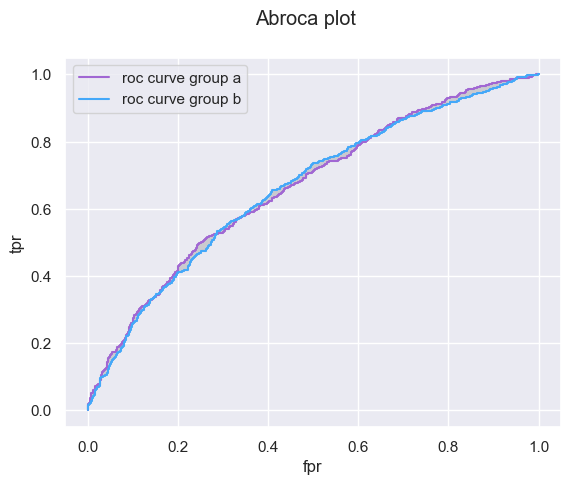

In [282]:
print(abroca(female, male, y_score, y_test))

abroca_plot(non_citizen, citizen, y_score, y_test)

In [291]:
# np.corrcoef(y_score, df_X_test['female'])
# np.corrcoef(y_score, 1- df_X_test['swiss'])

array([[1.        , 0.11498394],
       [0.11498394, 1.        ]])

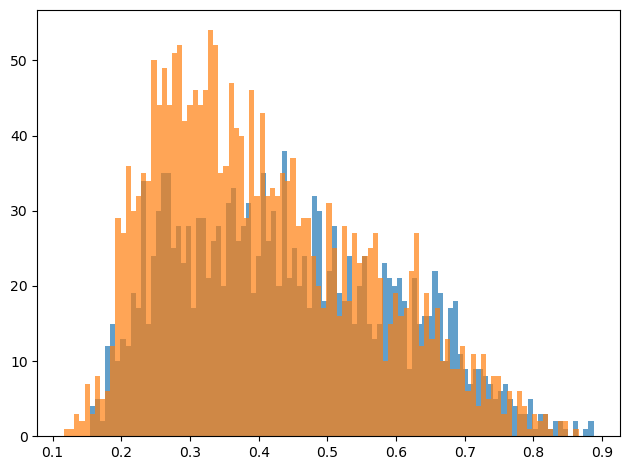

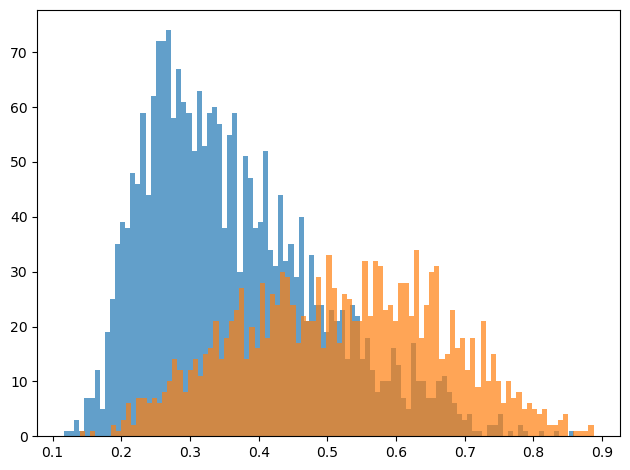

In [274]:
plt.hist(y_score[X_test['female']==1], bins=100, alpha=0.7)
plt.hist(y_score[X_test['female']==0], bins=100, alpha=0.7)

plt.tight_layout()
plt.show()

plt.hist(y_score[X_test['swiss']==1], bins=100, alpha=0.7)
plt.hist(y_score[X_test['swiss']==0], bins=100, alpha=0.7)

plt.tight_layout()
plt.show()

In [56]:

# number of folds for cross-validation
num_folds = 5 

cv_predictions = cross_val_predict(logreg_model, X, y, cv=num_folds, method='predict_proba')

# Perform cross-validation
cross_val_scores = cross_val_score(logreg_model, X, y, cv=num_folds, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linea

Cross-Validation Scores: [0.60507904 0.61466701 0.61327112 0.62078797 0.61083744]
Mean Accuracy: 0.6129285169201776


C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zezulka\Anaconda3\envs\2023-01-ALMP-LTU\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
cv_predictions[:,0]

array([0.66576007, 0.43423993, 0.77375757, ..., 0.63189132, 0.53430657,
       0.48445345])

In [277]:
plt.hist(cv_predictions[:,1], bins=100)
plt.show()

NameError: name 'cv_predictions' is not defined

In [65]:
cv_predictions.coef_()

AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

In [ ]:
# parameter values for models